<a href="https://colab.research.google.com/github/DataTak/finacial_data_analysis/blob/main/%08%EC%A3%BC%EA%B0%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 주가 데이터 수집(최근 10년 데이터, 종가)
- 주기성을 가질 수 있는 종목 찾기
- 지속적을 상승하고 있는 종목을 찾기
    - 배당주 종목을 가지고 진행해보자!

In [ ]:
pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import FinanceDataReader as fdr

In [ ]:
#맥쿼리인프라 10년간 주가 가지고 오기 (2번 후보: 한국기업평가(034950)
stocks = fdr.DataReader('088980', '2015-11-01', '2024-10-31')

In [ ]:
sp = pd.DataFrame(stocks['Close'])

In [ ]:
sp.head(1)

,Close
Date,
2015-11-02,7957


# 2. 수집한 데이터에 대한 시각화

<Axes: xlabel='Date'>

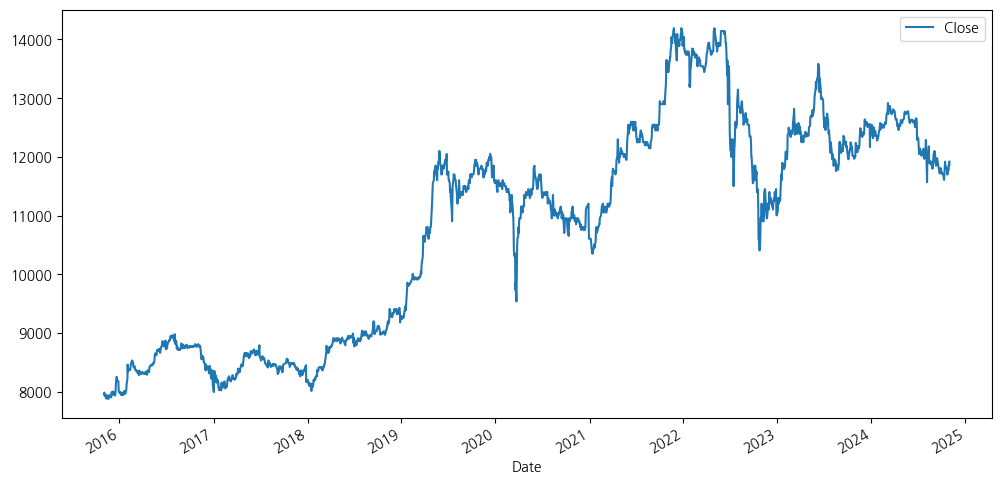

In [ ]:
sp.plot(figsize=(12,6))

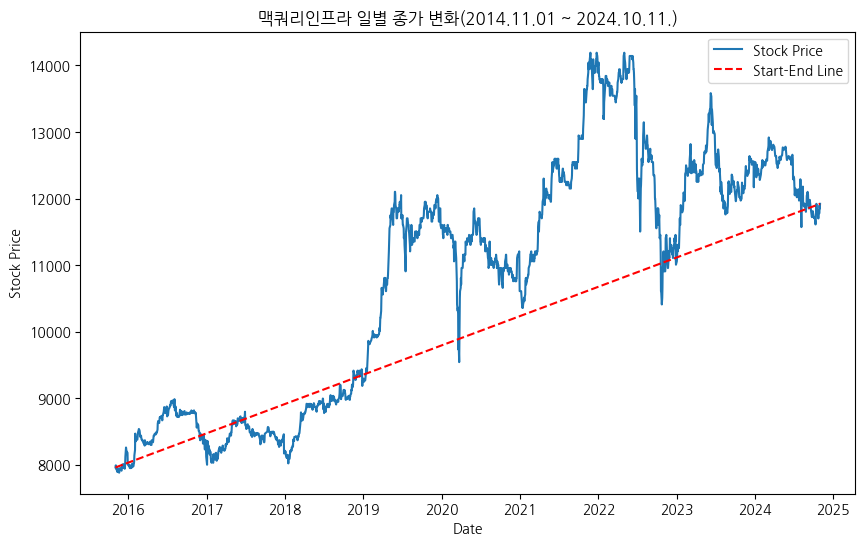

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 시작점과 끝점
start_point = sp['Close'].iloc[0]
end_point = sp['Close'].iloc[-1]

# 날짜 인덱스의 시작과 끝을 설정하여 직선 생성
x_values = [sp.index[0], sp.index[-1]]
y_values = [start_point, end_point]

# 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(sp.index, sp['Close'], label='Stock Price')
plt.plot(x_values, y_values, 'r--', label='Start-End Line')  # 시작-끝 직선
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('맥쿼리인프라 일별 종가 변화(2014.11.01 ~ 2024.10.11.)')
plt.show()


- 맥쿼리인프라의 주가는 10년 시계열로 보았을 때 우상향하는 경향이 있음.
- 주가의 트렌드를 보았을 때 단순한 선형적인 상승인지 2차함수로 포물선을 그리면서 상승인지 단순 시각화로는 판단하기 어려움.
- GPT의 도움을 받아 선형적인 트렌드인지 포물선의 트렌드인지 확인

R^2 for Linear Regression: 0.7526254622279149
R^2 for Polynomial (Quadratic) Regression: 0.7996617615883936


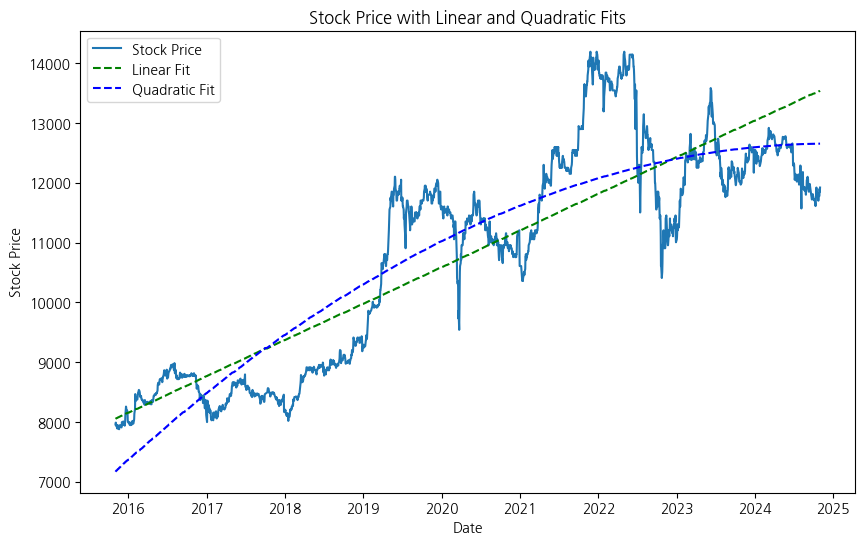

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 날짜를 숫자 형태로 변환
sp['date_num'] = np.arange(len(sp))

# 선형 회귀 모델
X = sp['date_num'].values.reshape(-1, 1)
y = sp['Close'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
linear_pred = linear_model.predict(X)
linear_r2 = r2_score(y, linear_pred)

# 2차 회귀 모델 (포물선)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_pred = poly_model.predict(X_poly)
poly_r2 = r2_score(y, poly_pred)

# R^2 값 출력
print("R^2 for Linear Regression:", linear_r2)
print("R^2 for Polynomial (Quadratic) Regression:", poly_r2)

# 플롯
plt.figure(figsize=(10, 6))
plt.plot(sp.index, sp['Close'], label='Stock Price')
plt.plot(sp.index, linear_pred, 'g--', label='Linear Fit')
plt.plot(sp.index, poly_pred, 'b--', label='Quadratic Fit')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price with Linear and Quadratic Fits')
plt.show()


- 선형보다 포물선적인 트렌드가 설명력이 더 높음.(0.75 / 0.799)
- 단순 시각적인 확인만으로 계절성을 확인할 수 없어 추가적인 계절성 확인 분석 실시.(GPT 도움)

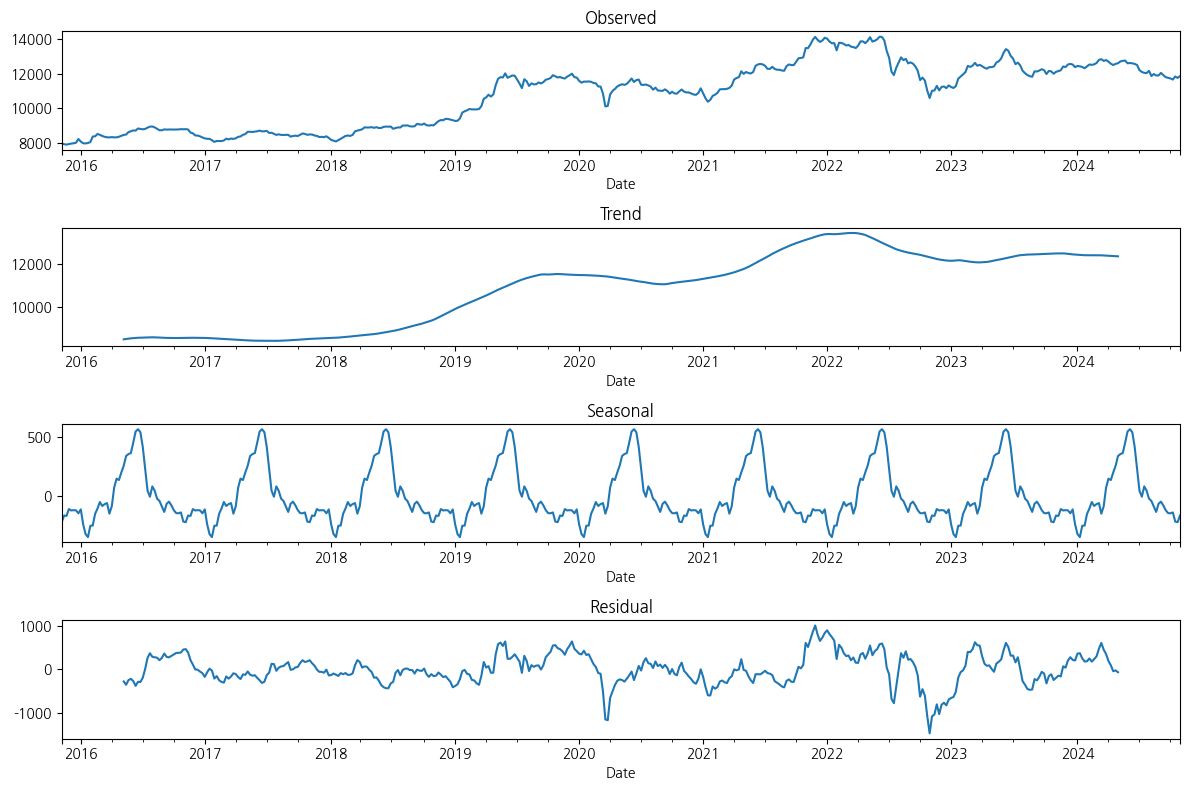

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터가 일일 단위로 있다고 가정하고, 주가 데이터가 'Close' 열에 있음
# 'sp'는 주가 데이터프레임
sp.index = pd.to_datetime(sp.index)  # 인덱스를 날짜 형식으로 변환

# 시계열 분해 (모든 데이터가 일일 단위로 있다면, 주간 또는 월간으로 리샘플링하는 것도 방법)
# 여기서는 주간 리샘플링을 예시로 사용합니다.
sp_weekly = sp['Close'].resample('W').mean()

# 선형 보간법으로 결측값 채우기
sp_weekly = sp_weekly.interpolate(method='linear')

# 시계열 분해 수행
decomposition = seasonal_decompose(sp_weekly, model='additive', period=52)

# 분해된 결과 시각화
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()


<ipython-input-40-134300da8033>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp_monthly = sp['Close'].resample('M').mean()


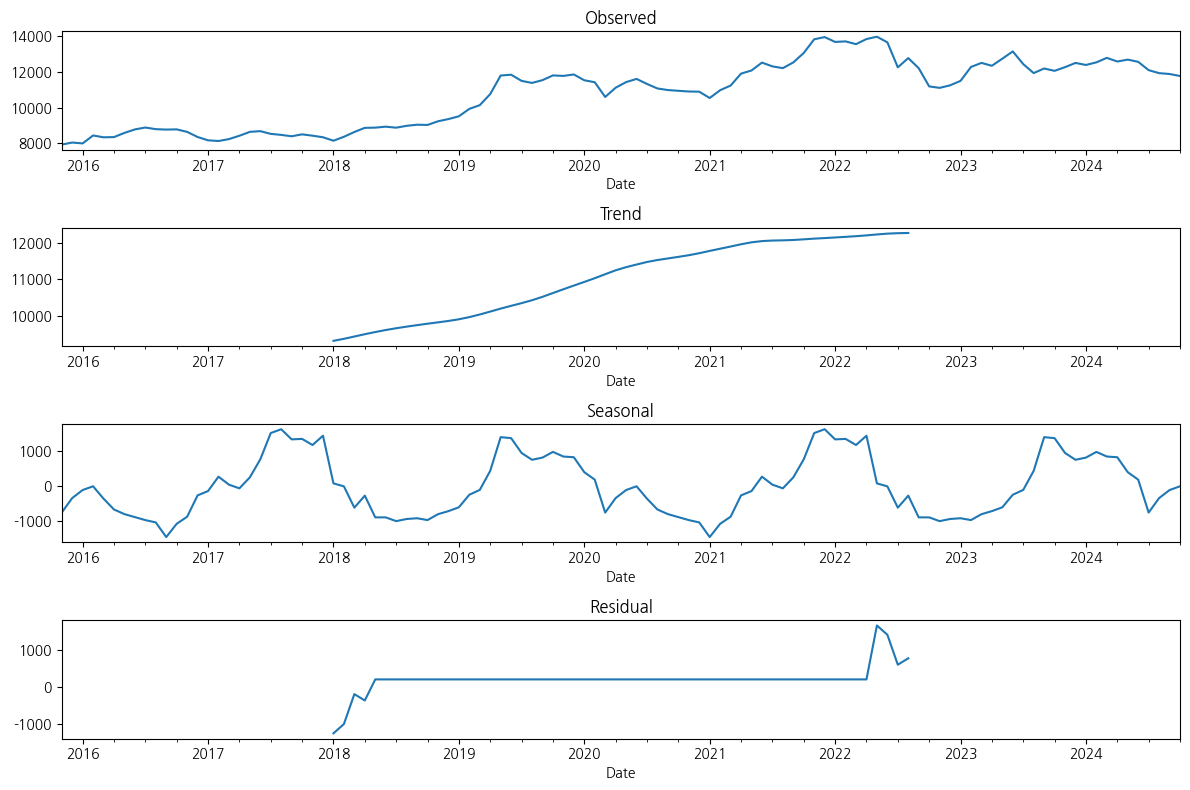

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터가 일일 단위로 있다고 가정하고, 주가 데이터가 'Close' 열에 있음
# 'sp'는 주가 데이터프레임
sp.index = pd.to_datetime(sp.index)  # 인덱스를 날짜 형식으로 변환

# 시계열 분해 (모든 데이터가 일일 단위로 있다면, 주간 또는 월간으로 리샘플링하는 것도 방법)
# 여기서는 주간 리샘플링을 예시로 사용합니다.
sp_monthly = sp['Close'].resample('M').mean()

# 선형 보간법으로 결측값 채우기
sp_monthly = sp_monthly.interpolate(method='linear')

# 시계열 분해 수행
decomposition = seasonal_decompose(sp_monthly, model='additive', period=52)

# 분해된 결과 시각화
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()


- 계절성은 월간으로 보았을 때 잔차가 작아서 월간 단위로 진행하기로 결정(😞이게 맞는지 잘 모르겠음.)


# 3. 트렌드 예측 모델 생성

## 독립변수 생성

In [ ]:
!git clone https://github.com/zzhining/time_series_basic.git


Cloning into 'time_series_basic'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 85 (delta 30), reused 17 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (85/85), 4.19 MiB | 11.84 MiB/s, done.
Resolving deltas: 100% (30/30), done.


<Axes: xlabel='Date'>

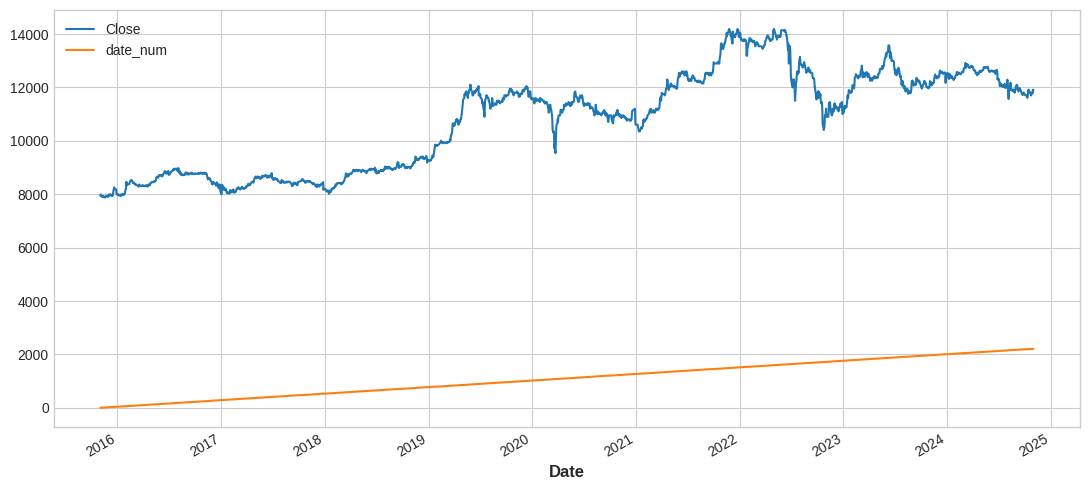

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from xgboost import XGBRegressor
import time_series_basic.util as util

y = sp.copy()
util.init_plt()
y.plot()

In [ ]:
dp = DeterministicProcess(index=y.index, constant=True, order=2 , drop=True)
X = dp.in_sample()
X.head()

,const,trend,trend_squared
Date,,,
2015-11-02,1.0,1.0,1.0
2015-11-03,1.0,2.0,4.0
2015-11-04,1.0,3.0,9.0
2015-11-05,1.0,4.0,16.0
2015-11-06,1.0,5.0,25.0


## 데이터 분할
 - 최근 1개월 데이터를 테스트용으로 설정
 - 인덱스를 기준으로 분할하고, 해당 인덱스에 해당하는 값을 학습용 데이터와 테스트용 데이터로 설정

In [ ]:
idx_train, idx_test = train_test_split(y.index, test_size=25, shuffle=False)
X_train, X_test = X.loc[idx_train, :], X.loc[idx_test, :]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

## 선형회귀 학습 모델 생성

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

## 예측

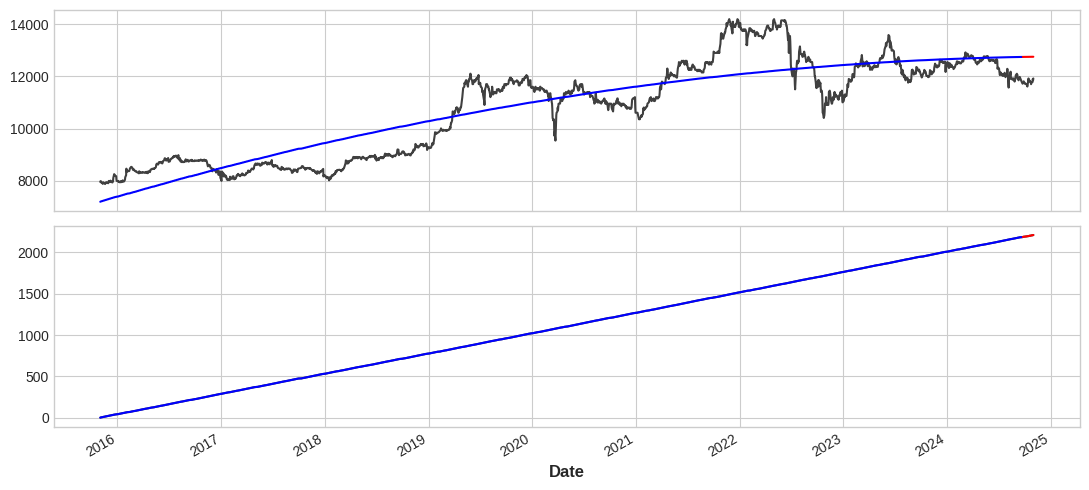

In [ ]:
y_fit = pd.DataFrame(model.predict(X_train), index=y_train.index, columns=y_train.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=y_test.index, columns=y_test.columns)

axs = y_train.plot(color='0.25', subplots=True, sharex=True, legend=False)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, legend=False, ax=axs)
axs = y_fit.plot(color='blue', subplots=True, sharex=True, legend=False, ax=axs)
axs = y_pred.plot(color='red', subplots=True, sharex=True, legend=False, ax=axs)

# 4. 계절성 예측 모델 생성

XGBoostRegressor를 사용하여 계절성을 예측하는 모델을 생성합니다. <br>
⚠주의⚠ : 주가 데이터는 계절성이 뚜렷하지 않은 데이터임

- `X`: 계절성 주기(예. 월, 요일, 주 등)
- `y`: 종가 - 선형회귀모델(트렌드를 예측한 값)

## 데이터 전처리

In [ ]:
X = sp.copy()
X["Month"] = X.index.month # 계절성의 주기를 '월' 단위로 봤음
X.head()

,Close,date_num,Month
Date,,,
2015-11-02,7957,0,11
2015-11-03,7987,1,11
2015-11-04,7987,2,11
2015-11-05,7937,3,11
2015-11-06,7937,4,11


In [ ]:
# 종속변수, 독립변수 할당
y = X['Close']
X = X['Month']

In [ ]:
# 데이터 분할
X_train, X_test = X.loc[idx_train], X.loc[idx_test]
y_train, y_test = y.loc[idx_train], y.loc[idx_test]

<Axes: xlabel='Date'>

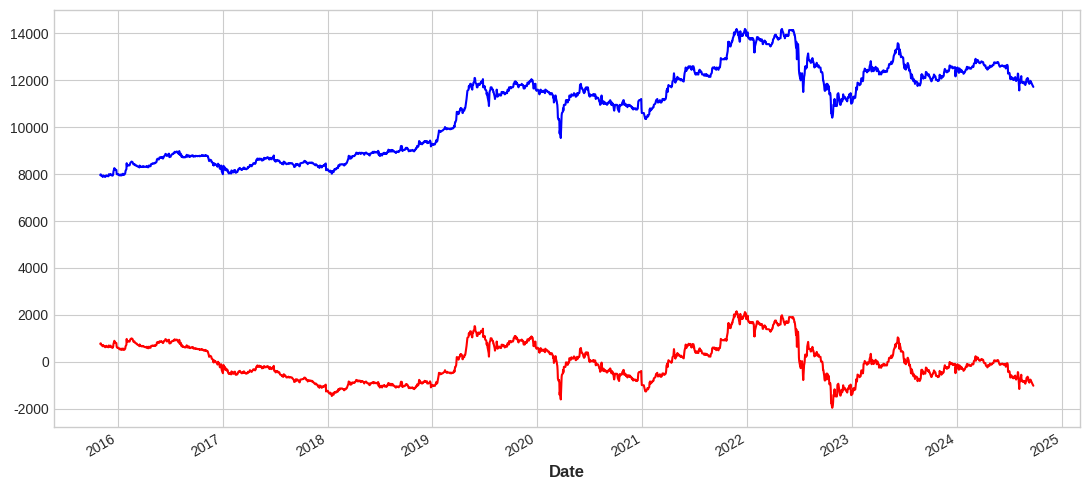

In [ ]:
# 종속변수(타겟변수)를 y_train(실제값)에서 선형회귀에서 학습한 부분(y_fit)을 제외한 값으로 설정
y_resid = y_train - y_fit['Close']
y_train.plot(color = 'blue')
y_resid.plot(color = 'red')

## 학습_XGBoost

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_resid)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 예측
-  선형회귀모델로 만든 결과(트렌드 예측) + XGB로 예측한 결과(계절성 예측)

In [ ]:
y_fit_boosted = xgb.predict(X_train) + y_fit['Close'] # 계절성 + 트렌드
y_pred_boosted = xgb.predict(X_test) + y_pred['Close']

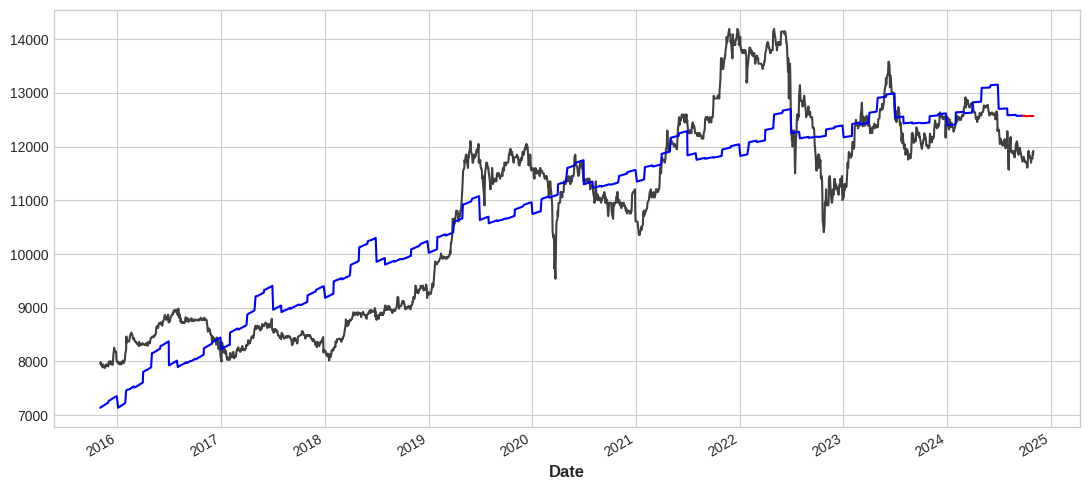

In [ ]:
axs = y_train.plot(color='0.25', subplots=True, sharex=True, legend=False)
axs = y_test.plot(color='0.25', subplots=True, sharex=True, legend=False, ax=axs)
axs = y_fit_boosted.plot(color='blue', subplots=True, sharex=True, legend=False, ax=axs)
axs = y_pred_boosted.plot(color='red', subplots=True, sharex=True, legend=False, ax=axs)